### Assignment: 
1. Create a sample data set of 1000 rows(placevisited, datatime, timespent) in json then load into data frame(df), this can be your daily movement in the house to the shop etc.
2. Using df logics add 3 new columns max, min and avg timespent for the given day and location.
3. Use DF SQL to find the places u visited most.
4. Filter df to that place and plot it.
5. Next plot every place visited more than 5 times parallel using thread.

### Solution:

In [7]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Generating random datetime
def random_date(start_date, end_date):
    return start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds()))
    )

#Places visited regularly by Emmanuel
places = ["Home", "Office", "Shop", "Park", "Gym", "School", "Bathroom", "Kitchen", 
         "Living Room", "Bedroom", "University of Nebraska", "Bus Station", 
         "Popeyes", "MacDonalds", "Walmart", "Bank", "Hospital", "Family House", 
         "Theatre", "Park", "Starbucks", "Target", "Stadium"]
start_date = datetime(2024, 1, 1, 8, 0, 0)
end_date = datetime(2024, 1, 14, 22, 0, 0)

data = []
current_datetime = start_date

for _ in range(1000):
    place = random.choice(places)
    timespent = random.randint(30, 240)
    
    # Calculate ending time for the current place
    end_datetime = current_datetime + timedelta(seconds=timespent)
    data.append({"placevisited": place, "datetime": current_datetime, "timespent": timespent})
    
    # Move to the next datetime for the next place
    current_datetime = end_datetime

df = pd.DataFrame(data)

In [10]:
print(df.head(10))

             placevisited            datetime  timespent
0              MacDonalds 2024-01-01 08:00:00        239
1  University of Nebraska 2024-01-01 08:03:59         57
2             Living Room 2024-01-01 08:04:56         84
3                Hospital 2024-01-01 08:06:20        169
4                    Park 2024-01-01 08:09:09         85
5            Family House 2024-01-01 08:10:34        194
6              MacDonalds 2024-01-01 08:13:48         59
7                  School 2024-01-01 08:14:47        174
8  University of Nebraska 2024-01-01 08:17:41        101
9                    Bank 2024-01-01 08:19:22        169


In [13]:
#Creating the json file for records
df.to_json("mymovement2024.json", orient="records", lines=True)

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Getting the day and location of my movements to aggregate them
df['day'] = df['datetime'].dt.date
df['location'] = df['placevisited']

agg_df = df.groupby(['day', 'location'])['timespent'].agg(['max', 'min', 'mean']).reset_index()
agg_df.rename(columns={'max': 'max_timespent', 'min': 'min_timespent', 'mean': 'avg_timespent'}, inplace=True)

df = pd.merge(df, agg_df, on=['day', 'location'])

print(df.head())

  placevisited            datetime  timespent         day    location  \
0   MacDonalds 2024-01-01 08:00:00        239  2024-01-01  MacDonalds   
1   MacDonalds 2024-01-01 08:13:48         59  2024-01-01  MacDonalds   
2   MacDonalds 2024-01-01 08:53:34         80  2024-01-01  MacDonalds   
3   MacDonalds 2024-01-01 10:04:11         41  2024-01-01  MacDonalds   
4   MacDonalds 2024-01-01 12:17:02        116  2024-01-01  MacDonalds   

   max_timespent  min_timespent  avg_timespent  
0            239             41          129.7  
1            239             41          129.7  
2            239             41          129.7  
3            239             41          129.7  
4            239             41          129.7  


In [20]:
 pip install -U pandasql

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [22]:
from pandasql import sqldf

query = """
    SELECT
        location,
        COUNT(*) as visit_count
    FROM
        df
    GROUP BY
        location
    ORDER BY
        visit_count DESC; 
"""

result = sqldf(query)

result.head()

,location,visit_count
0,Park,69
1,Hospital,52
2,Gym,51
3,School,50
4,MacDonalds,49


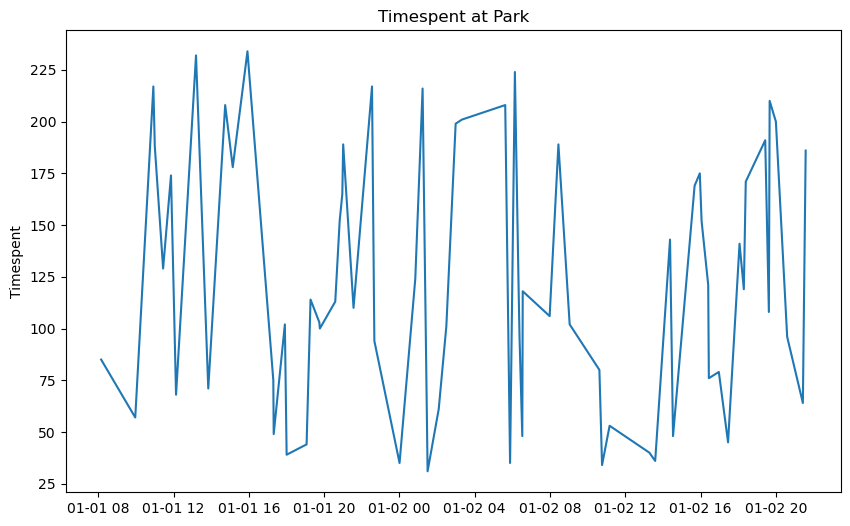

In [27]:
import matplotlib.pyplot as plt

most_visited_place = result.iloc[0]['location']

# Extracting the places visited most from the original data set
filtered_df = df[df['location'] == most_visited_place]


plt.figure(figsize=(10, 6))
plt.plot(filtered_df['datetime'], filtered_df['timespent'], label='Timespent')
plt.title(f'Timespent at {most_visited_place}')
plt.ylabel('Timespent')
plt.show()


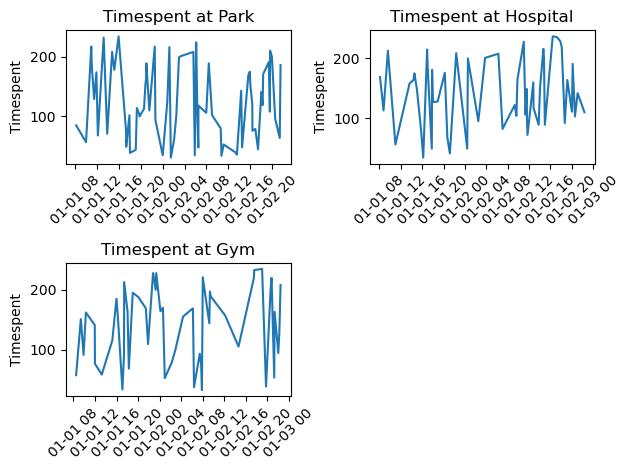

In [52]:
import concurrent.futures
import matplotlib.pyplot as plt

%matplotlib inline 

places_visited_more_than_50 = result[result['visit_count'] > 50]['location'].tolist()

def plot_timespent(location, df, subplot_index):
    filtered_df = df[df['location'] == location]
    plt.subplot(2, 2, subplot_index)  # Adjust the subplot layout as needed
    plt.plot(filtered_df['datetime'], filtered_df['timespent'], label='Timespent')
    plt.title(f'Timespent at {location}')
    plt.ylabel('Timespent')
    plt.xticks(rotation=45)

with concurrent.futures.ThreadPoolExecutor() as executor:
    for i, (location, df_slice) in enumerate(zip(places_visited_more_than_50, [df]*len(places_visited_more_than_50))):
        executor.submit(plot_timespent, location, df_slice, i+1)

plt.tight_layout() 
plt.show()



